In [121]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import plotly.express as px

#Iterative Imputation null values
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

#randomforest regressor immputation null values
from sklearn.ensemble import RandomForestRegressor

#Matrix Factorization immputation null values:
from fancyimpute import MatrixFactorization

#outliers detection by z-score and IQR
import numpy as np
from scipy import stats

# SimpleImputer with Mean Imputation for outliers
from sklearn.impute import SimpleImputer

In [88]:
df=pd.read_csv(r"flood_final.csv")

In [89]:
df.shape

(1117957, 23)

In [90]:
df.head()

,MonsoonIntensity,TopographyDrainage,RiverManagement,Deforestation,Urbanization,ClimateChange,DamsQuality,Siltation,AgriculturalPractices,Encroachments,...,Landslides,Watersheds,DeterioratingInfrastructure,PopulationScore,WetlandLoss,InadequatePlanning,PoliticalFactors,FloodProbability,ClimateAnthropogenicInteraction,InfrastructurePreventionInteraction
0,0.039335,1.467011,0.020654,1.489348,0.508518,-0.453698,-0.458827,-0.932697,-0.938761,-0.456037,...,NaN,0.033750,-0.448380,0.999385,0.024238,0.990022,-0.929064,0.445,189.0,182.0
1,0.525633,0.989450,-0.461971,-0.459918,1.468781,1.489614,-0.938314,0.034964,-0.455784,0.504258,...,-2.371757,NaN,0.035848,-0.929273,-0.943079,-0.452061,-0.929064,0.450,308.0,255.0
2,0.525633,NaN,0.503280,1.002031,NaN,1.003786,-1.897287,0.034964,-0.455784,0.024110,...,0.995936,0.033750,0.520076,1.481549,-1.426738,-0.932756,-0.929064,0.530,247.0,210.0
3,-0.933262,-0.443233,0.503280,0.027398,-0.451746,1.489614,-0.458827,1.002626,0.510172,1.464552,...,0.995936,-0.446379,-0.448380,0.517220,0.024238,0.990022,0.028255,0.535,253.0,180.0
4,0.039335,-0.920793,-1.427222,0.514715,-0.451746,-0.453698,-0.938314,-0.932697,-0.938761,-0.936185,...,0.514837,0.513878,-0.448380,-1.893602,-1.426738,-0.932756,0.028255,0.415,144.0,90.0


# statistical insight from data

In [91]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1117957 entries, 0 to 1117956
Data columns (total 23 columns):
 #   Column                               Non-Null Count    Dtype  
---  ------                               --------------    -----  
 0   MonsoonIntensity                     1044764 non-null  float64
 1   TopographyDrainage                   1050005 non-null  float64
 2   RiverManagement                      1040178 non-null  float64
 3   Deforestation                        1067011 non-null  float64
 4   Urbanization                         1072446 non-null  float64
 5   ClimateChange                        1084200 non-null  float64
 6   DamsQuality                          1081989 non-null  float64
 7   Siltation                            1089670 non-null  float64
 8   AgriculturalPractices                1098118 non-null  float64
 9   Encroachments                        1111688 non-null  float64
 10  IneffectiveDisasterPreparedness      1061710 non-null  float64
 11

In [92]:
df.describe(include='all')

,MonsoonIntensity,TopographyDrainage,RiverManagement,Deforestation,Urbanization,ClimateChange,DamsQuality,Siltation,AgriculturalPractices,Encroachments,...,Landslides,Watersheds,DeterioratingInfrastructure,PopulationScore,WetlandLoss,InadequatePlanning,PoliticalFactors,FloodProbability,ClimateAnthropogenicInteraction,InfrastructurePreventionInteraction
count,1.044764e+06,1.050005e+06,1.040178e+06,1.067011e+06,1.072446e+06,1.084200e+06,1.081989e+06,1.089670e+06,1.098118e+06,1.111688e+06,...,1.069014e+06,1.064453e+06,1.081200e+06,1.089913e+06,1.101178e+06,1.100092e+06,1.108769e+06,1.117957e+06,1.047269e+06,1.075491e+06
mean,9.552808e-04,-4.475300e-04,-1.213146e-03,-4.097235e-04,6.561259e-04,1.564233e-04,-5.659662e-04,8.446064e-05,-6.524540e-04,-3.025960e-04,...,8.506591e-04,-9.001414e-05,-5.391223e-04,1.824578e-04,4.643927e-04,1.009558e-04,-9.536265e-04,5.044803e-01,1.945720e+02,2.196949e+02
std,1.000180e+00,9.996742e-01,1.000084e+00,9.998424e-01,1.000443e+00,9.998835e-01,9.987888e-01,9.996119e-01,9.988855e-01,1.000331e+00,...,9.998815e-01,9.997530e-01,9.996513e-01,1.000108e+00,1.000638e+00,1.000425e+00,1.000550e+00,5.102610e-02,6.983045e+01,7.427087e+01
min,-2.392157e+00,-2.353476e+00,-2.392472e+00,-2.409185e+00,-2.372274e+00,-2.397010e+00,-2.376773e+00,-2.384190e+00,-2.387694e+00,-2.376627e+00,...,-2.371757e+00,-2.366894e+00,-2.385293e+00,-2.375766e+00,-2.394055e+00,-2.374838e+00,-2.365044e+00,2.850000e-01,0.000000e+00,1.000000e+01
25%,-9.332621e-01,-9.207935e-01,-4.619709e-01,-4.599185e-01,-9.318782e-01,-9.395261e-01,-4.588273e-01,-9.326975e-01,-9.387612e-01,-4.560372e-01,...,-9.284602e-01,-9.265077e-01,-9.326085e-01,-9.292729e-01,-4.594203e-01,-9.327556e-01,-9.290645e-01,4.700000e-01,1.440000e+02,1.680000e+02
50%,3.933451e-02,3.432829e-02,2.065439e-02,2.739809e-02,2.838565e-02,3.213002e-02,2.065928e-02,3.496413e-02,2.719406e-02,2.411016e-02,...,3.373778e-02,3.374961e-02,3.584786e-02,3.505590e-02,2.423846e-02,2.863302e-02,2.825546e-02,5.050000e-01,1.890000e+02,2.100000e+02
75%,5.256328e-01,5.118892e-01,5.032797e-01,5.147147e-01,5.085176e-01,5.179581e-01,5.001458e-01,5.187949e-01,5.101717e-01,5.042576e-01,...,5.148368e-01,5.138783e-01,5.200761e-01,5.172203e-01,5.078972e-01,5.093273e-01,5.069154e-01,5.400000e-01,2.380000e+02,2.660000e+02
max,5.388616e+00,6.242620e+00,5.329533e+00,5.875197e+00,5.789969e+00,5.862067e+00,5.295011e+00,5.357103e+00,5.339948e+00,6.266026e+00,...,5.325827e+00,5.315165e+00,5.846586e+00,6.303193e+00,6.795460e+00,5.316270e+00,5.293515e+00,7.250000e-01,7.400000e+02,7.800000e+02


# adding one column of probability condition based on the threshold value

In [93]:
df['probaility_condition']=df['FloodProbability'].apply(lambda x:1 if x>0.5 else 0)

In [94]:
df.columns

Index(['MonsoonIntensity', 'TopographyDrainage', 'RiverManagement',
       'Deforestation', 'Urbanization', 'ClimateChange', 'DamsQuality',
       'Siltation', 'AgriculturalPractices', 'Encroachments',
       'IneffectiveDisasterPreparedness', 'DrainageSystems',
       'CoastalVulnerability', 'Landslides', 'Watersheds',
       'DeterioratingInfrastructure', 'PopulationScore', 'WetlandLoss',
       'InadequatePlanning', 'PoliticalFactors', 'FloodProbability',
       'ClimateAnthropogenicInteraction',
       'InfrastructurePreventionInteraction', 'probaility_condition'],
      dtype='object')

In [95]:
df.probaility_condition.head()

0    0
1    0
2    1
3    1
4    0
Name: probaility_condition, dtype: int64

# checkig unique values from each column

In [96]:
for column in df.columns:
    unique_values = df[column].unique()
    unique_count = len(unique_values)
    print(f"{column}: {unique_count} unique values")
    print(f"Unique values: {unique_values}")

MonsoonIntensity: 18 unique values
Unique values: [ 0.03933451  0.52563284 -0.93326213  1.49822949 -0.44696381  1.01193116
  1.98452781         nan -1.41956046  2.47082614 -1.90585878 -2.39215711
  2.95712446  3.44342279  3.92972111  4.90231776  4.41601943  5.38861608]
TopographyDrainage: 20 unique values
Unique values: [ 1.46701093  0.98945005         nan -0.44323259 -0.92079347  0.51188917
 -1.39835435  0.03432829 -1.87591523  1.94457181  2.42213269  3.37725445
 -2.35347611  2.89969357  3.85481532  4.3323762   5.28749796  4.80993708
  5.76505884  6.24261972]
RiverManagement: 18 unique values
Unique values: [ 0.02065439 -0.46197094  0.50327973 -1.42722162 -1.90984695  1.4685304
 -0.94459628         nan -2.39247229  1.95115574  0.98590507  2.43378107
  2.91640641  3.39903175  4.84690776  3.88165708  4.36428242  5.32953309]
Deforestation: 19 unique values
Unique values: [ 1.48934777 -0.45991847  1.00203121  0.02739809  0.51471465         nan
 -0.94723503  1.97666433 -1.43455159 -2.40918

# plots before the cleaning of the data to undersatnd the some insights

# 1.Distribution of Target Column (FloodProbability)

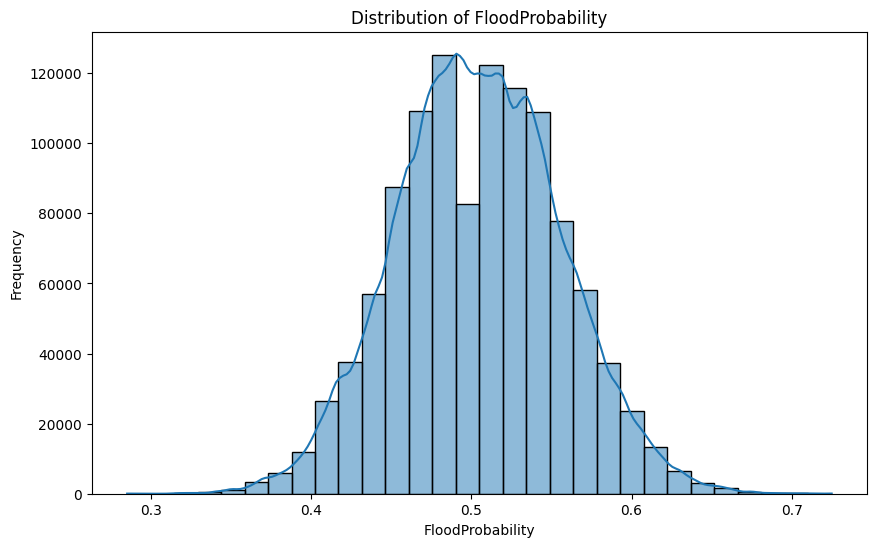

In [97]:
plt.figure(figsize=(10, 6))
sns.histplot(df['FloodProbability'], bins=30, kde=True)
plt.title('Distribution of FloodProbability')
plt.xlabel('FloodProbability')
plt.ylabel('Frequency')
plt.show()

# 2. Box Plot for Outlier Detection

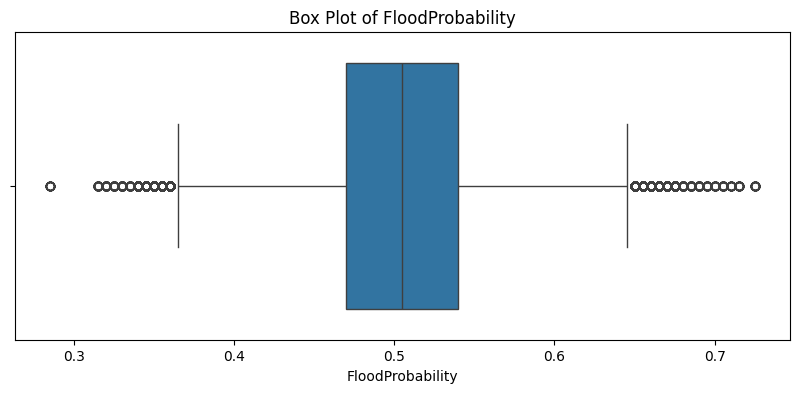

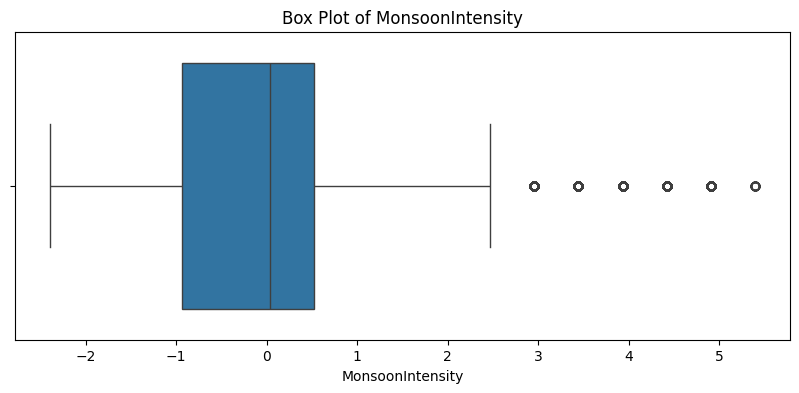

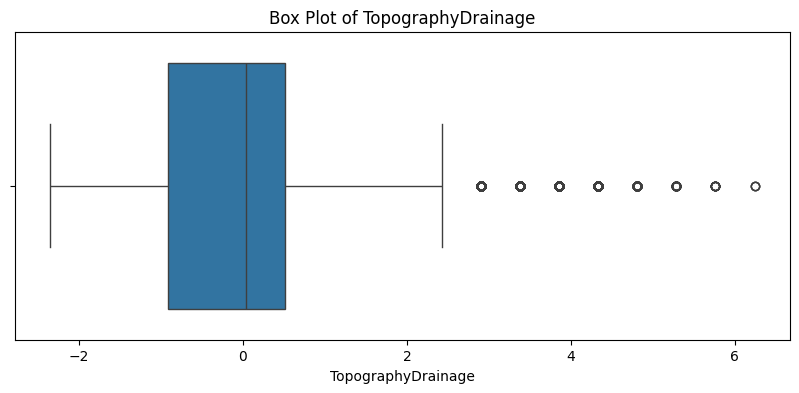

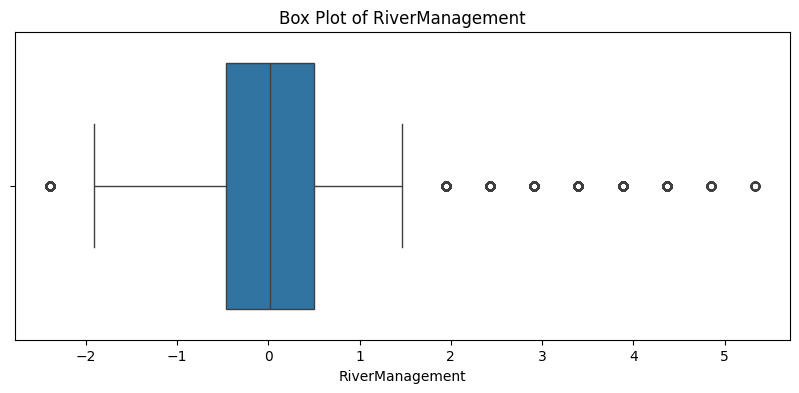

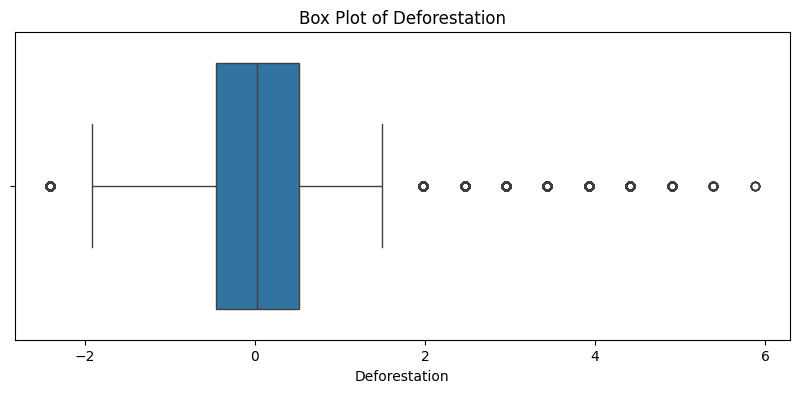

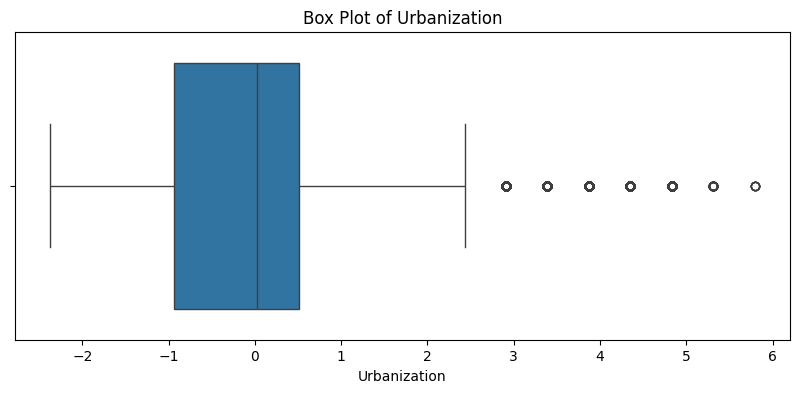

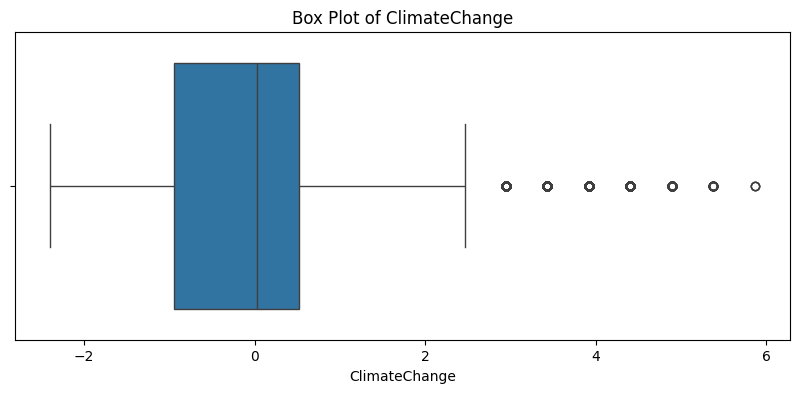

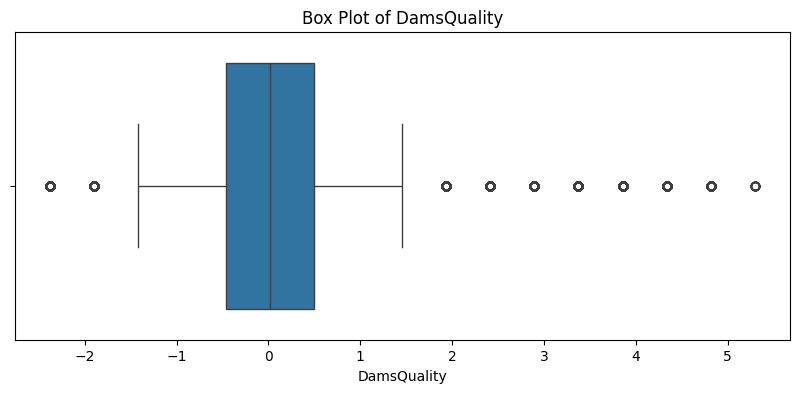

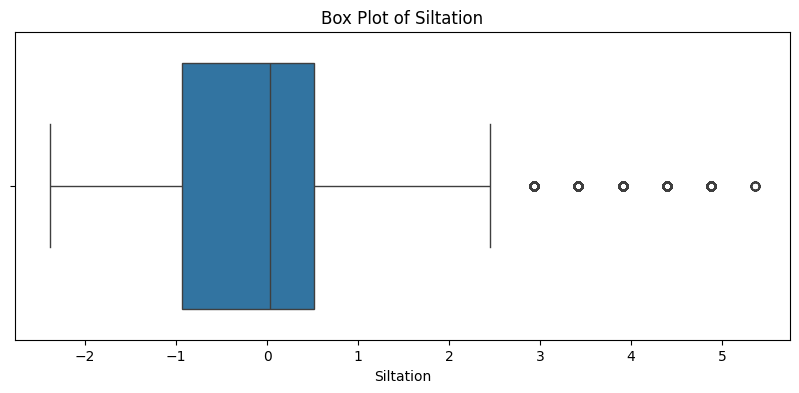

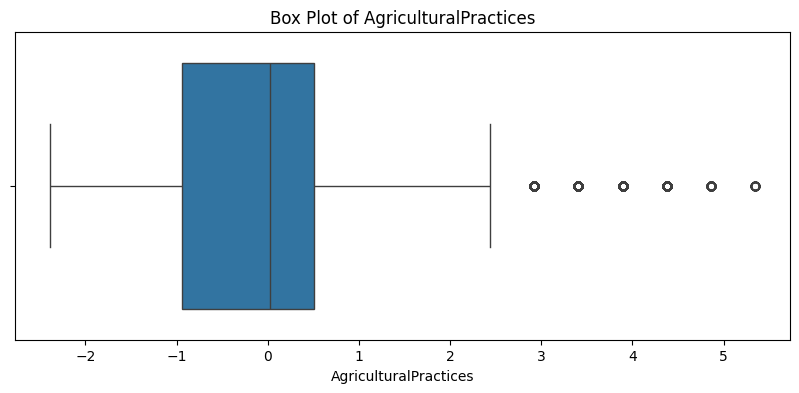

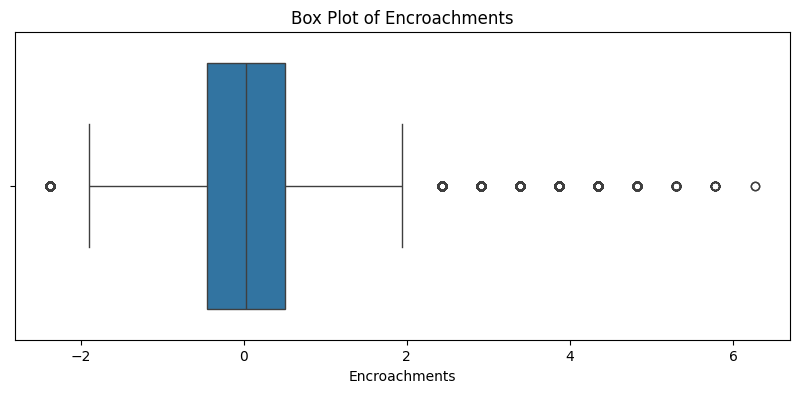

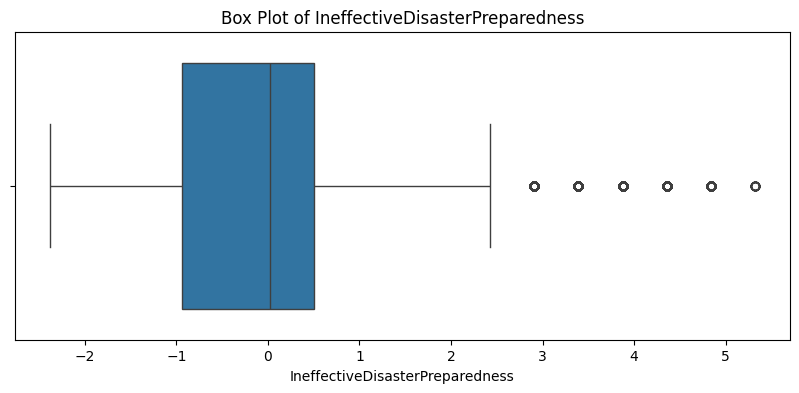

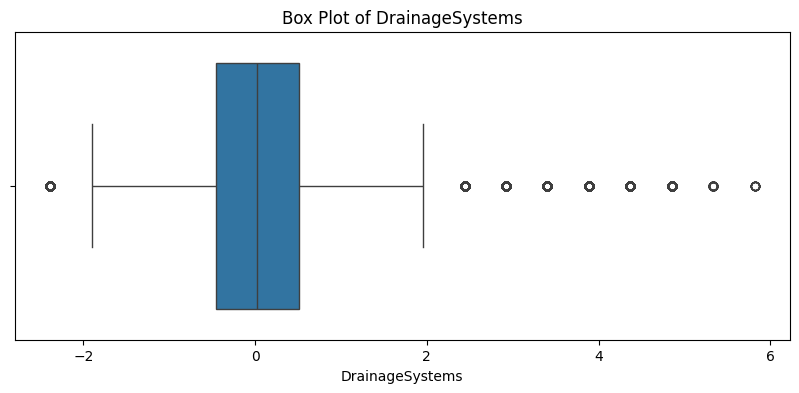

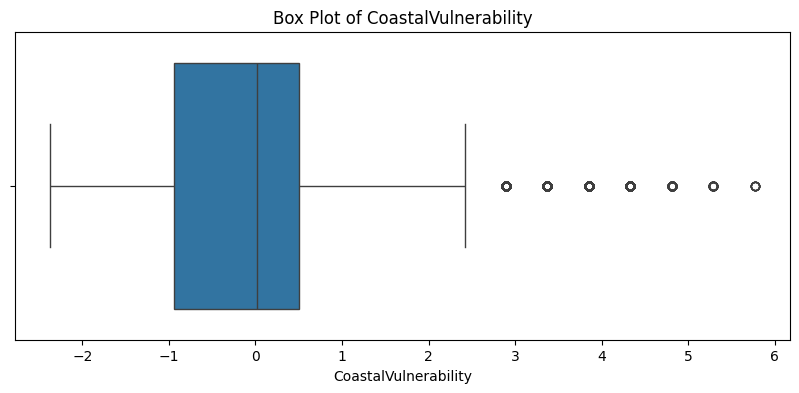

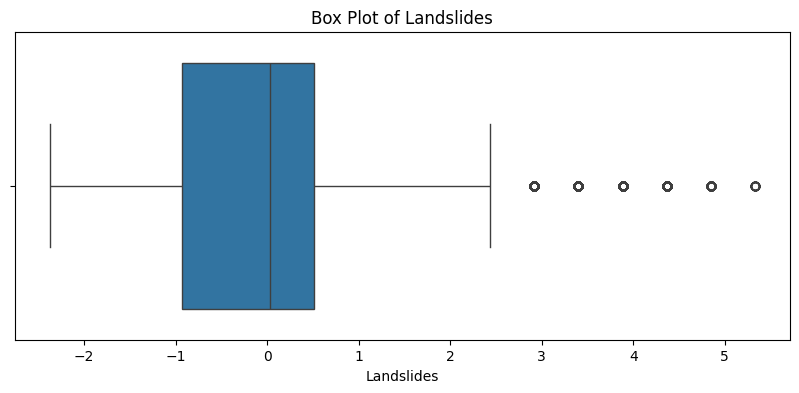

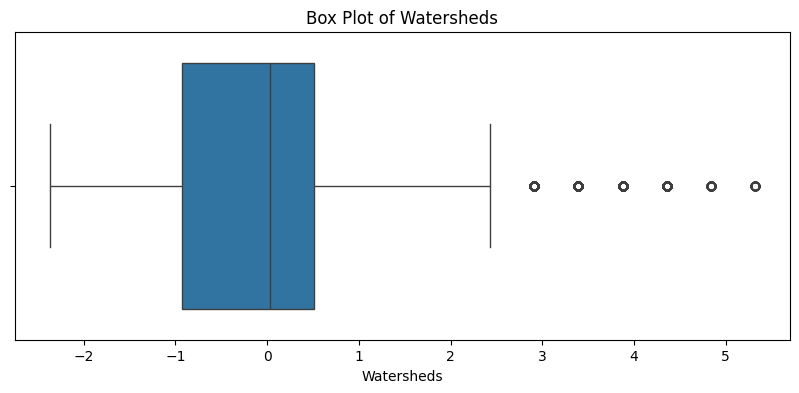

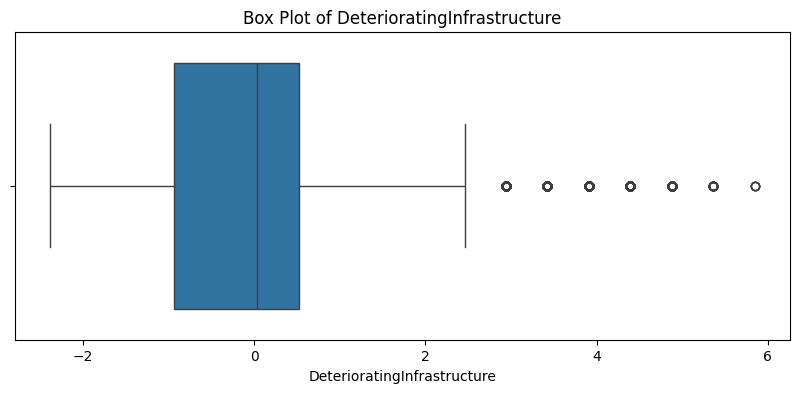

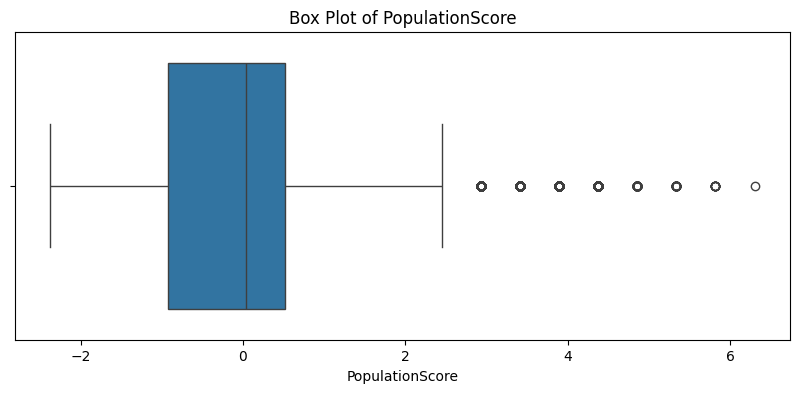

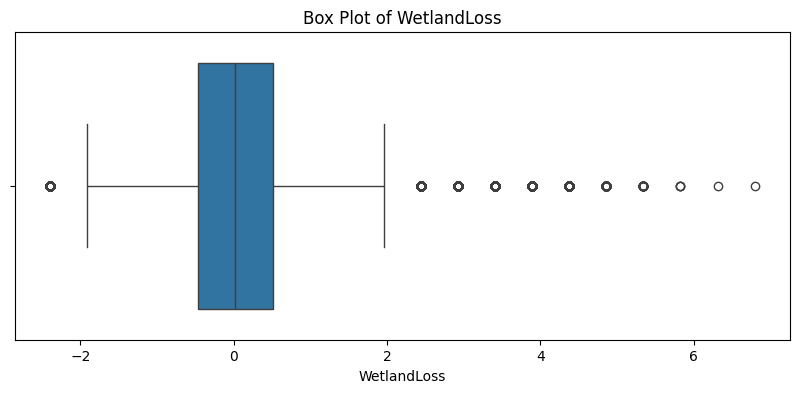

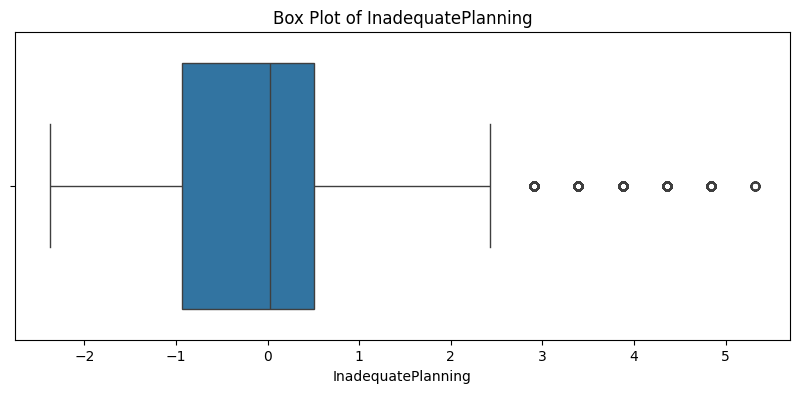

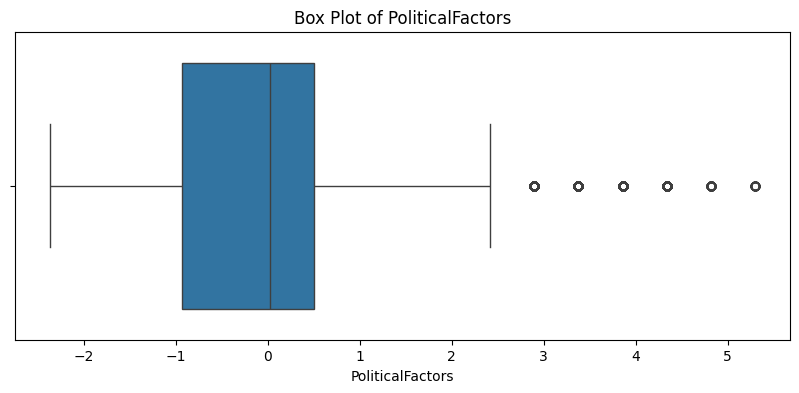

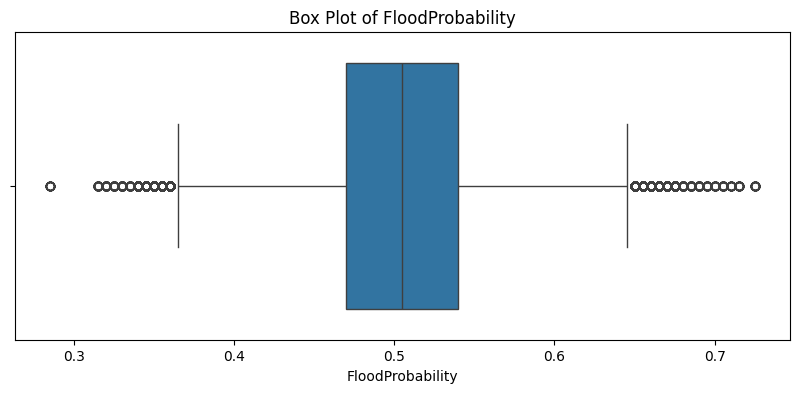

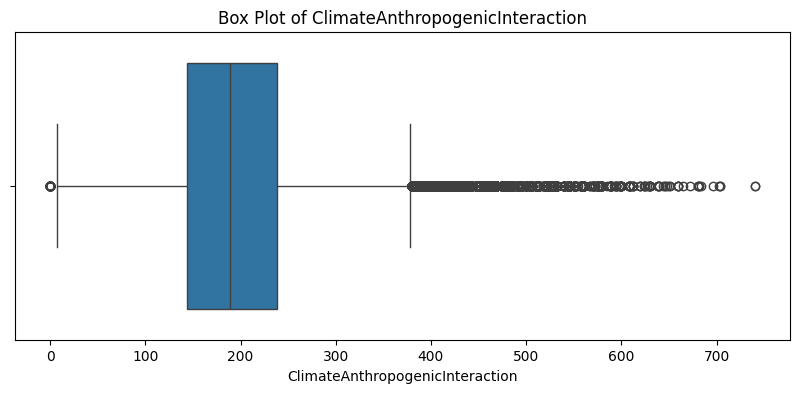

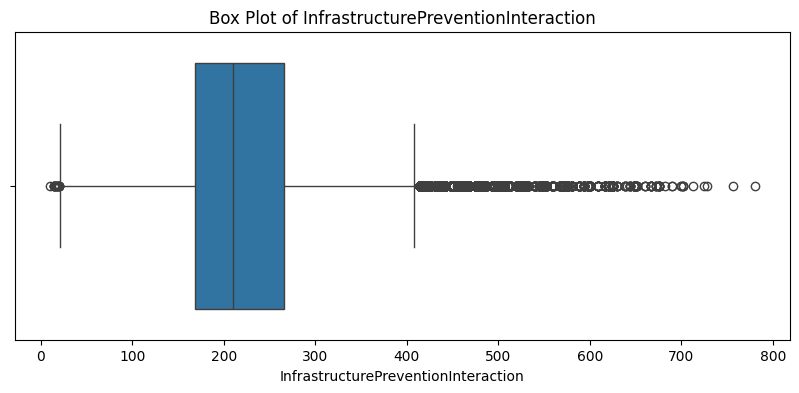

In [98]:
selected_cols = ['FloodProbability'] + list(df.columns[:-1])  # Include target column and features

for col in selected_cols:
    plt.figure(figsize=(10, 4))
    sns.boxplot(x=df[col])
    plt.title(f'Box Plot of {col}')
    plt.xlabel(col)
    plt.show()

# 3. class distribution plot

In [99]:
class_distribution = df['probaility_condition'].value_counts()
class_distribution

probaility_condition
1    569434
0    548523
Name: count, dtype: int64

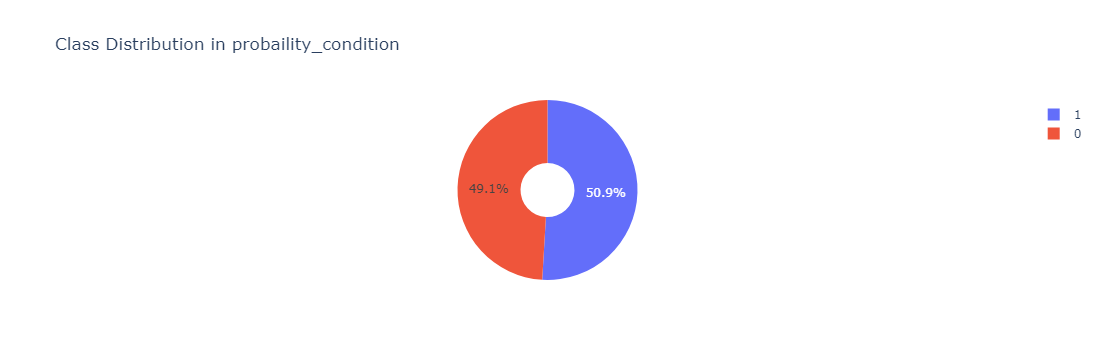

In [100]:
import plotly.express as px

colors = ['#FF6347', '#4682B4'] 
labels = {0: 'No Flood', 1: 'Flood'}

fig = px.pie(
    names=class_distribution.index, 
    values=class_distribution.values,
    color=class_distribution.index,
    color_discrete_map=labels,
    title='Class Distribution in probaility_condition',
    hole=0.3,  # Donut chart
    labels=labels  # Update labels
)

fig.show()


# data cleaning

In [101]:
df.isnull().sum()

MonsoonIntensity                       73193
TopographyDrainage                     67952
RiverManagement                        77779
Deforestation                          50946
Urbanization                           45511
ClimateChange                          33757
DamsQuality                            35968
Siltation                              28287
AgriculturalPractices                  19839
Encroachments                           6269
IneffectiveDisasterPreparedness        56247
DrainageSystems                        57240
CoastalVulnerability                   73378
Landslides                             48943
Watersheds                             53504
DeterioratingInfrastructure            36757
PopulationScore                        28044
WetlandLoss                            16779
InadequatePlanning                     17865
PoliticalFactors                        9188
FloodProbability                           0
ClimateAnthropogenicInteraction        70688
Infrastruc

In [102]:
total_rows = len(df)

# Calculate the number of null values for each column
null_counts = df.isnull().sum()

# Calculate the percentage of null values for each column
null_percentage = (null_counts / total_rows) * 100

# Display the percentage of null values
print(null_percentage)

MonsoonIntensity                       6.547032
TopographyDrainage                     6.078230
RiverManagement                        6.957244
Deforestation                          4.557063
Urbanization                           4.070908
ClimateChange                          3.019526
DamsQuality                            3.217297
Siltation                              2.530240
AgriculturalPractices                  1.774576
Encroachments                          0.560755
IneffectiveDisasterPreparedness        5.031231
DrainageSystems                        5.120054
CoastalVulnerability                   6.563580
Landslides                             4.377896
Watersheds                             4.785873
DeterioratingInfrastructure            3.287872
PopulationScore                        2.508504
WetlandLoss                            1.500863
InadequatePlanning                     1.598004
PoliticalFactors                       0.821856
FloodProbability                       0

# Compute Correlation Matrix and heatmap for columns having null values to understand which columns to impute which to drop

In [103]:
columns_with_missing = [
    'MonsoonIntensity', 'TopographyDrainage', 'RiverManagement',
    'ClimateChange', 'Siltation', 'AgriculturalPractices',
    'IneffectiveDisasterPreparedness', 'DrainageSystems',
    'CoastalVulnerability', 'DeterioratingInfrastructure',
    'PopulationScore', 'WetlandLoss', 'InadequatePlanning',
    'ClimateAnthropogenicInteraction', 'InfrastructurePreventionInteraction'
]

correlation_matrix = df[columns_with_missing + ['FloodProbability']].corr()

(correlation_matrix)

,MonsoonIntensity,TopographyDrainage,RiverManagement,ClimateChange,Siltation,AgriculturalPractices,IneffectiveDisasterPreparedness,DrainageSystems,CoastalVulnerability,DeterioratingInfrastructure,PopulationScore,WetlandLoss,InadequatePlanning,ClimateAnthropogenicInteraction,InfrastructurePreventionInteraction,FloodProbability
MonsoonIntensity,1.000000,-0.007208,-0.008633,-0.008243,-0.008530,-0.008723,-0.007860,-0.010136,-0.011061,-0.008629,-0.008559,-0.006876,-0.007751,0.565746,-0.019706,0.189013
TopographyDrainage,-0.007208,1.000000,-0.010518,-0.009643,-0.010293,-0.009442,-0.010789,-0.009829,-0.012870,-0.006982,-0.010775,-0.009972,-0.011339,-0.021460,-0.022959,0.187621
RiverManagement,-0.008633,-0.010518,1.000000,-0.009411,-0.009940,-0.010656,-0.010339,-0.011391,-0.011339,-0.005878,-0.006662,-0.009901,-0.010610,-0.022466,0.393121,0.186991
ClimateChange,-0.008243,-0.009643,-0.009411,1.000000,-0.009051,-0.011603,-0.011037,-0.009467,-0.013042,-0.006277,-0.010102,-0.009253,-0.010668,0.563115,-0.022353,0.184601
Siltation,-0.008530,-0.010293,-0.009940,-0.009051,1.000000,-0.010029,-0.009448,-0.010683,-0.011779,-0.006349,-0.008692,-0.008891,-0.009321,-0.021565,-0.022008,0.186665
AgriculturalPractices,-0.008723,-0.009442,-0.010656,-0.011603,-0.010029,1.000000,-0.010801,-0.010897,-0.011150,-0.008538,-0.008921,-0.011368,-0.010319,0.270113,-0.024262,0.183455
IneffectiveDisasterPreparedness,-0.007860,-0.010789,-0.010339,-0.011037,-0.009448,-0.010801,1.000000,-0.012714,-0.009597,-0.009715,-0.011774,-0.010229,-0.012172,-0.023446,0.390499,0.183285
DrainageSystems,-0.010136,-0.009829,-0.011391,-0.009467,-0.010683,-0.010897,-0.012714,1.000000,-0.013635,-0.009610,-0.012015,-0.011312,-0.012885,-0.024009,0.388506,0.179193
CoastalVulnerability,-0.011061,-0.012870,-0.011339,-0.013042,-0.011779,-0.011150,-0.009597,-0.013635,1.000000,-0.010126,-0.013006,-0.012144,-0.013960,-0.028880,-0.028056,0.177811
DeterioratingInfrastructure,-0.008629,-0.006982,-0.005878,-0.006277,-0.006349,-0.008538,-0.009715,-0.009610,-0.010126,1.000000,-0.007531,-0.008762,-0.008345,-0.019580,0.393434,0.190237


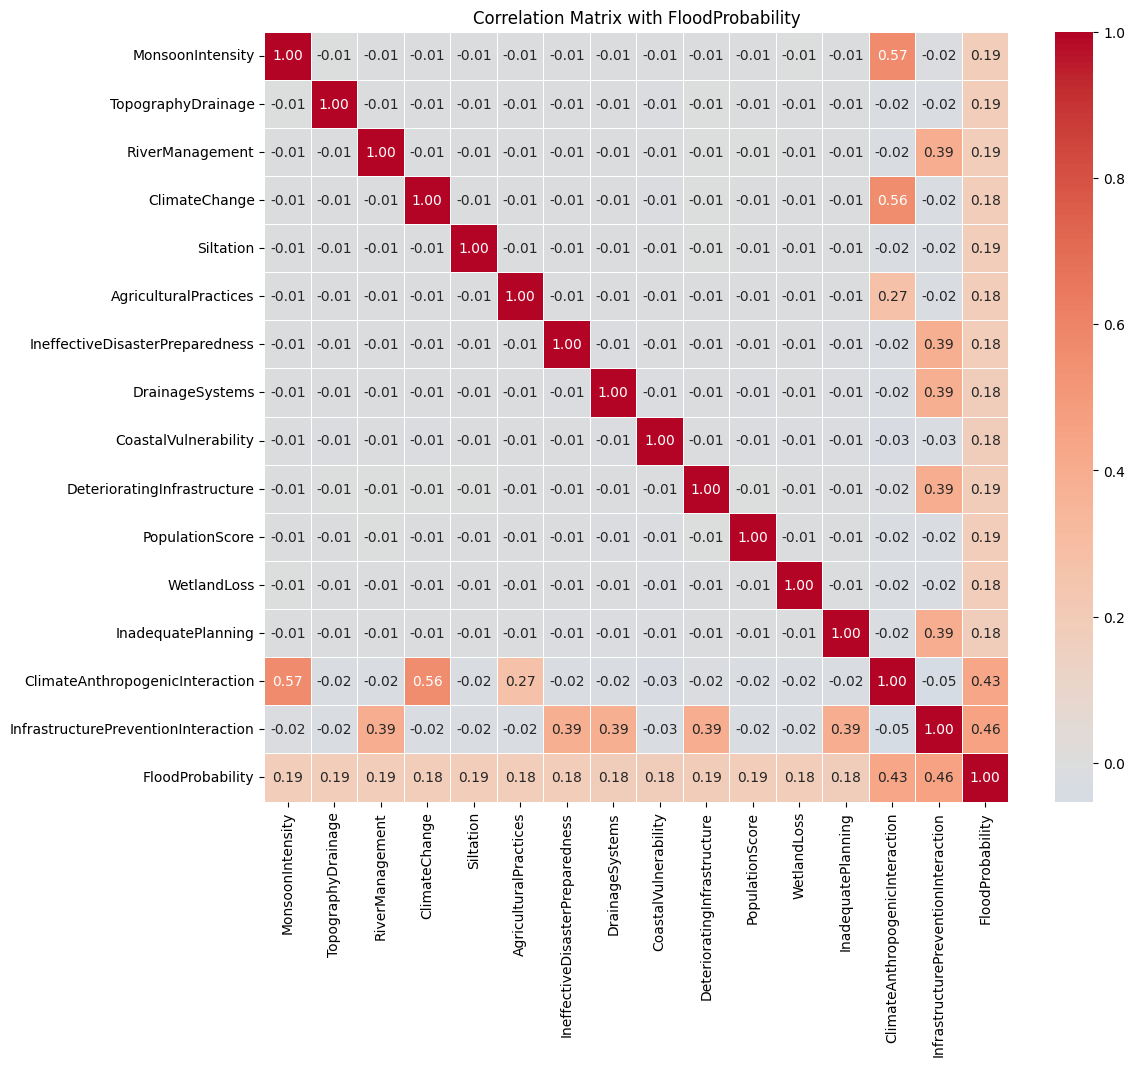

In [104]:
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, fmt='.2f', linewidths=.5)
plt.title('Correlation Matrix with FloodProbability')
plt.show()

In [105]:
'''Rationale for Not Dropping Null Values Based on Correlation Analysis
In our analysis, we carefully examined the correlation matrix to guide our decision on handling null values. The decision not to drop rows with null values from certain columns was influenced by the following considerations:

Columns with Stronger Correlations:

ClimateAnthropogenicInteraction and InfrastructurePreventionInteraction: These columns exhibit strong correlations with the target variable, FloodProbability. Their imputation is crucial as they have a significant impact on flood predictions.
Less Impactful Columns:

Encroachments, PoliticalFactors, AgriculturalPractices, WetlandLoss, and InadequatePlanning: Although these columns have null values, their lower correlation with the target variable and other predictors suggests they have less impact on the overall model performance. Dropping rows with null values in these columns helps maintain a cleaner dataset while minimizing loss of important data.
Data Preservation:

Dropping rows with null values from columns that are less correlated but still potentially relevant can lead to significant data loss, affecting the overall integrity of the dataset. Imputation methods are employed to preserve as much data as possible, ensuring that the analysis remains comprehensive and robust.
By focusing on imputation for columns with higher correlation and impact, we aim to maintain the dataset's integrity while addressing null values in a way that enhances model accuracy and reliability.

'''

"Rationale for Not Dropping Null Values Based on Correlation Analysis\nIn our analysis, we carefully examined the correlation matrix to guide our decision on handling null values. The decision not to drop rows with null values from certain columns was influenced by the following considerations:\n\nColumns with Stronger Correlations:\n\nClimateAnthropogenicInteraction and InfrastructurePreventionInteraction: These columns exhibit strong correlations with the target variable, FloodProbability. Their imputation is crucial as they have a significant impact on flood predictions.\nLess Impactful Columns:\n\nEncroachments, PoliticalFactors, AgriculturalPractices, WetlandLoss, and InadequatePlanning: Although these columns have null values, their lower correlation with the target variable and other predictors suggests they have less impact on the overall model performance. Dropping rows with null values in these columns helps maintain a cleaner dataset while minimizing loss of important data.\

In [106]:
columns_to_drop = ['Encroachments', 'PoliticalFactors', 'AgriculturalPractices', 'WetlandLoss', 'InadequatePlanning']
df.dropna(subset=columns_to_drop, inplace=True)

# 1.Median Imputation Code

In [107]:
median_columns = ['Deforestation', 'Landslides', 'Watersheds']
df[median_columns] = df[median_columns].fillna(df[median_columns].median())

# 2.Linear Interpolation Imputation code

In [108]:
interpolate_columns = ['Urbanization', 'DamsQuality']
df[interpolate_columns] = df[interpolate_columns].interpolate(method='linear')

# 3.Iterative Imputation 

In [109]:
columns_to_impute_iterative = ['MonsoonIntensity', 'TopographyDrainage', 'RiverManagement', 'CoastalVulnerability', 'ClimateAnthropogenicInteraction']
iterative_imputer = IterativeImputer()

df[columns_to_impute_iterative] = iterative_imputer.fit_transform(df[columns_to_impute_iterative])

# 4.Multiple Imputation by Chained Equations (MICE)

In [110]:
columns_to_impute_mice = ['ClimateChange', 'Siltation', 'DeterioratingInfrastructure', 'InfrastructurePreventionInteraction',
                          'IneffectiveDisasterPreparedness', 'DrainageSystems', 'PopulationScore']
mice_imputer = IterativeImputer() 
df[columns_to_impute_mice] = mice_imputer.fit_transform(df[columns_to_impute_mice])

# outliers
# statistical methods
# z-score 
# because data is approximately normally distributed

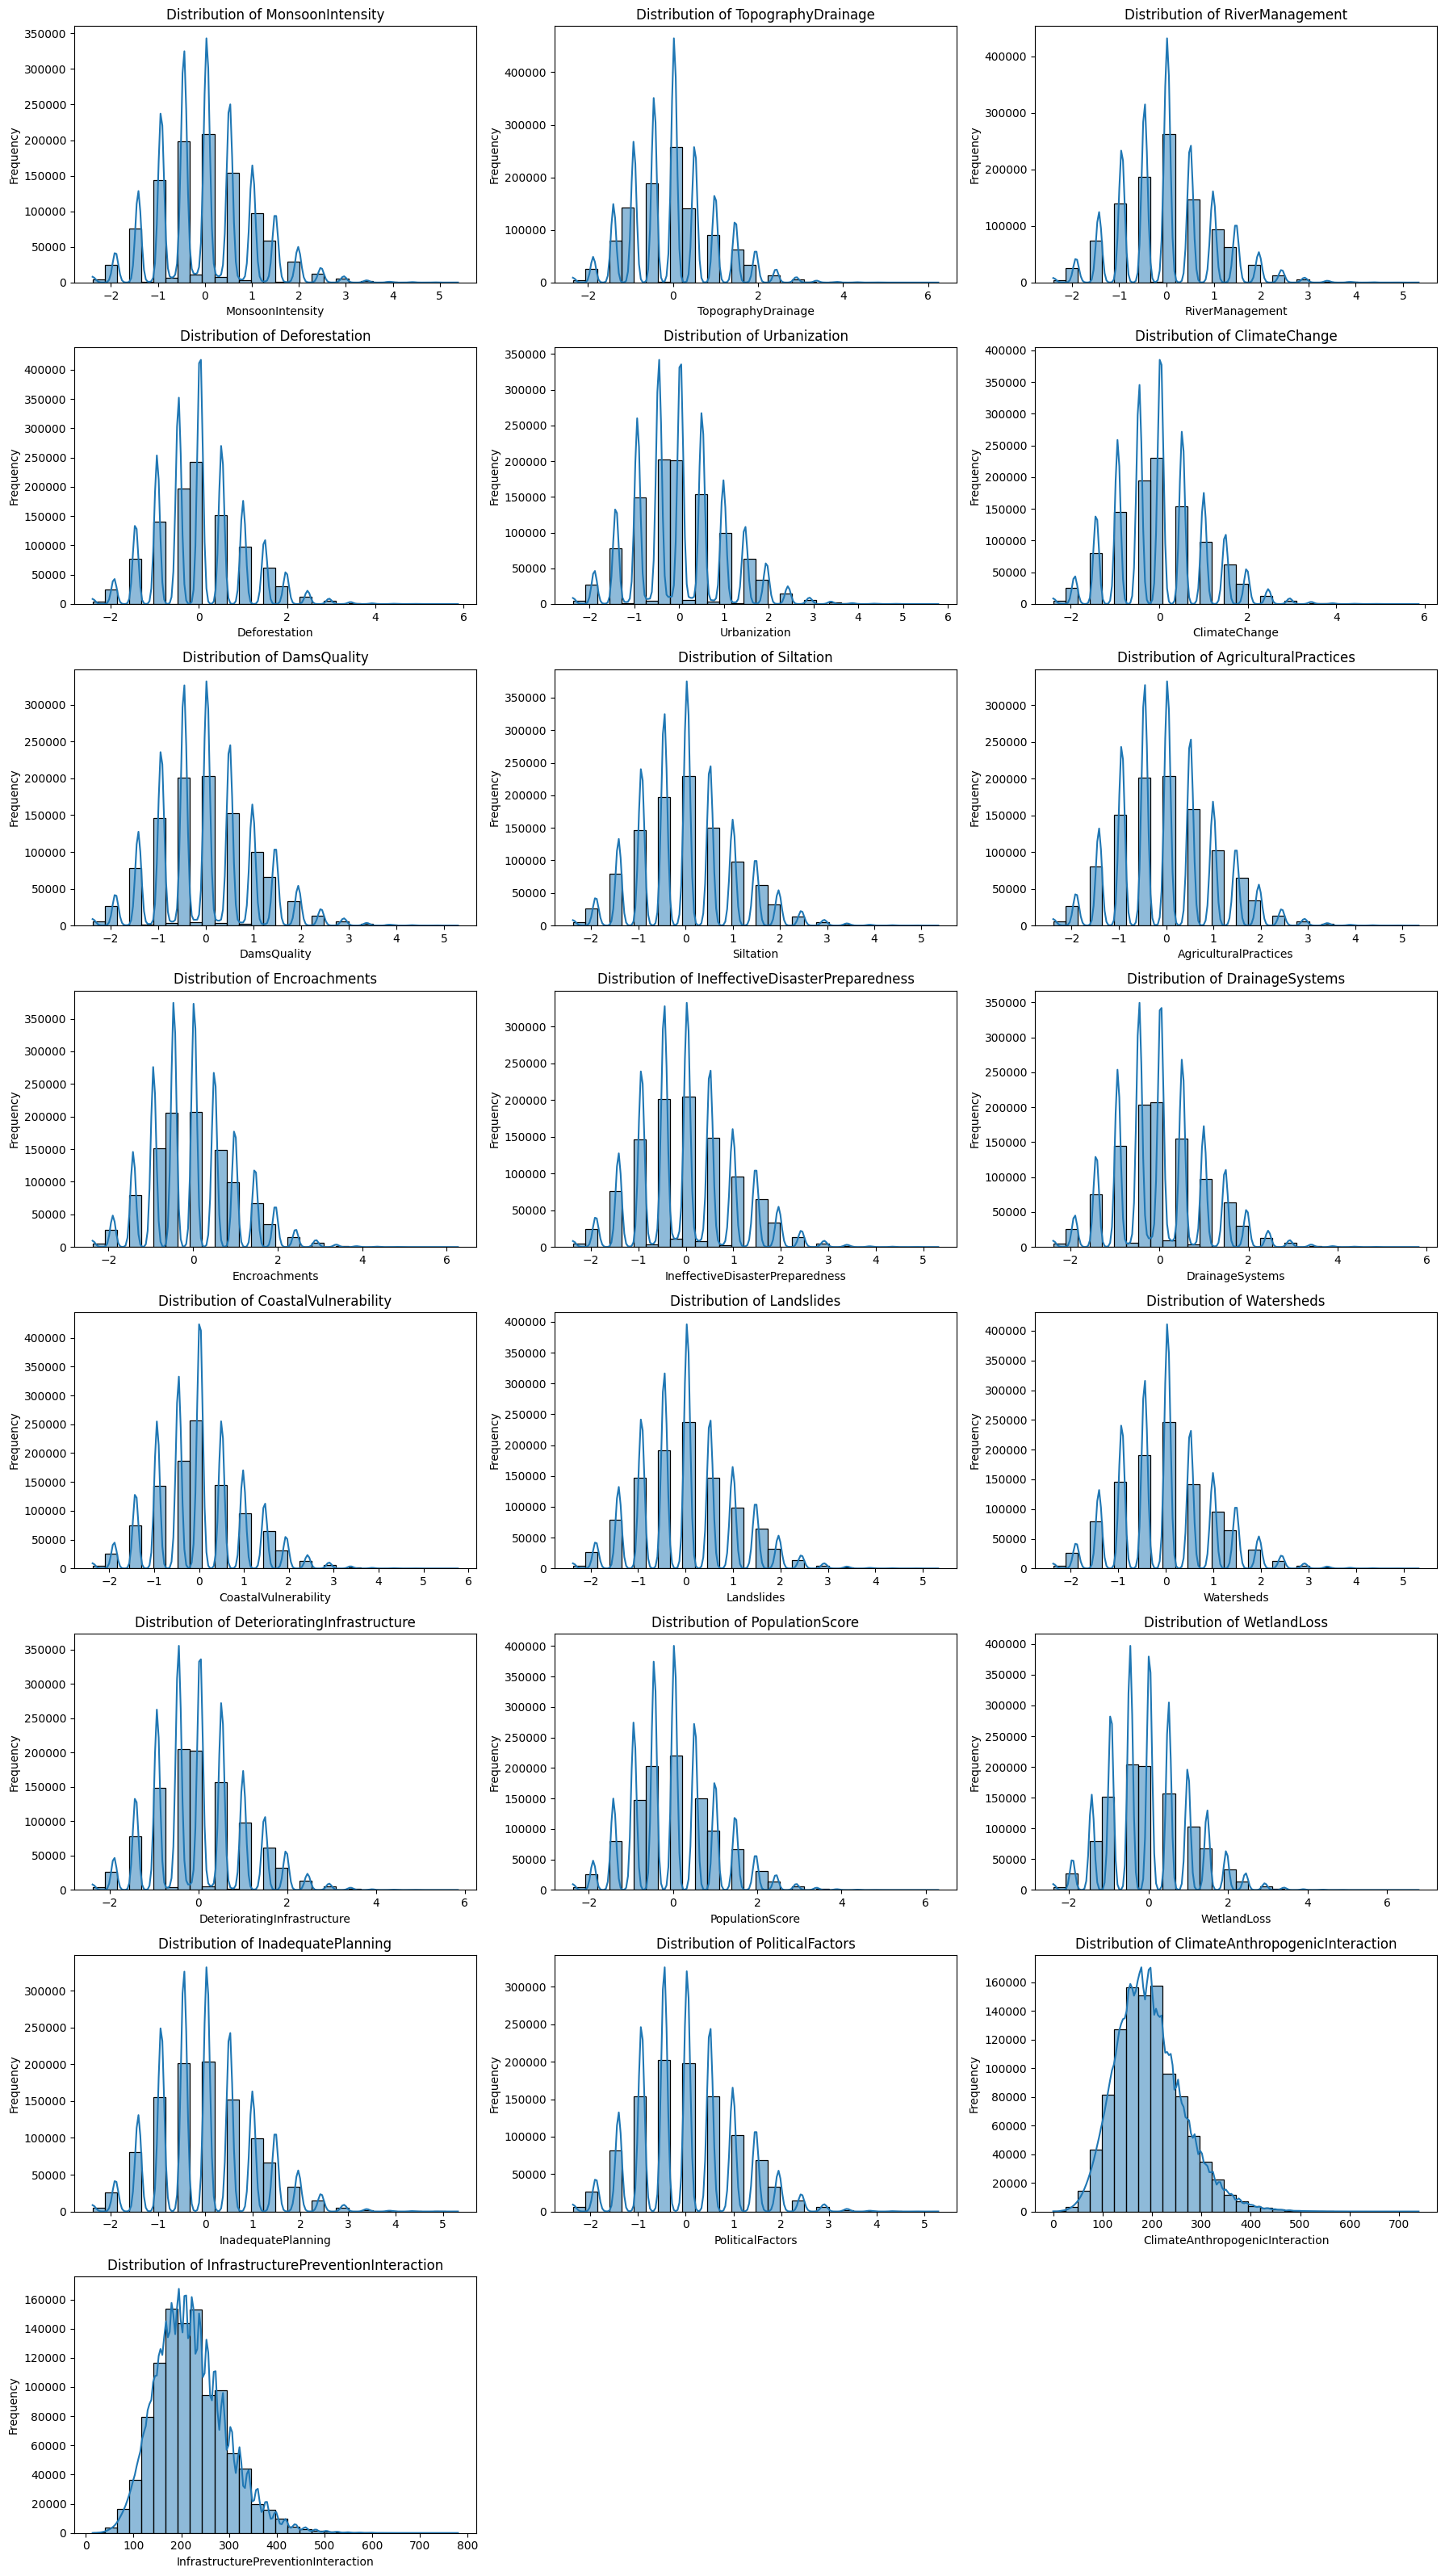

In [111]:
num_columns = len(columns)
num_rows = (num_columns // 3) + int(num_columns % 3 != 0)

# Create subplots
fig, axes = plt.subplots(nrows=num_rows, ncols=3, figsize=(18, 4 * num_rows))
axes = axes.flatten()

# Plot each column
for i, column in enumerate(columns):
    sns.histplot(df[column].dropna(), bins=30, kde=True, ax=axes[i])
    axes[i].set_title(f'Distribution of {column}')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Frequency')

# Remove unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

In [125]:
columns = ['MonsoonIntensity', 'TopographyDrainage', 'RiverManagement',
           'Deforestation', 'Urbanization', 'ClimateChange', 'DamsQuality',
           'Siltation', 'AgriculturalPractices', 'Encroachments',
           'IneffectiveDisasterPreparedness', 'DrainageSystems',
           'CoastalVulnerability', 'Landslides', 'Watersheds',
           'DeterioratingInfrastructure', 'PopulationScore', 'WetlandLoss',
           'InadequatePlanning', 'PoliticalFactors', 'ClimateAnthropogenicInteraction',
           'InfrastructurePreventionInteraction']

def detect_outliers_zscore(df, columns, threshold=3):
    outliers = {}
    for column in columns:
        z_scores = np.abs(stats.zscore(df[column].dropna()))
        outliers[column] = df[column][z_scores > threshold].index.tolist()
    return outliers
    
zscore_outliers = detect_outliers_zscore(df, columns)
#zscore_outliers
for column, indices in zscore_outliers.items():
    print(f"{column}: {len(indices)} outliers")

MonsoonIntensity: 0 outliers
TopographyDrainage: 4846 outliers
RiverManagement: 0 outliers
Deforestation: 0 outliers
Urbanization: 4398 outliers
ClimateChange: 0 outliers
DamsQuality: 4875 outliers
Siltation: 4574 outliers
AgriculturalPractices: 4711 outliers
Encroachments: 0 outliers
IneffectiveDisasterPreparedness: 0 outliers
DrainageSystems: 0 outliers
CoastalVulnerability: 0 outliers
Landslides: 4325 outliers
Watersheds: 4448 outliers
DeterioratingInfrastructure: 0 outliers
PopulationScore: 0 outliers
WetlandLoss: 0 outliers
InadequatePlanning: 4642 outliers
PoliticalFactors: 0 outliers
ClimateAnthropogenicInteraction: 1142 outliers
InfrastructurePreventionInteraction: 38 outliers


# dropping outliers based on z-score of columns and domain knowledge

In [119]:
columns = ['MonsoonIntensity', 'TopographyDrainage', 'RiverManagement',
           'Deforestation', 'Urbanization', 'ClimateChange', 'DamsQuality',
           'Siltation', 'AgriculturalPractices', 'Encroachments',
           'IneffectiveDisasterPreparedness', 'DrainageSystems',
           'CoastalVulnerability', 'Landslides', 'Watersheds',
           'DeterioratingInfrastructure', 'PopulationScore', 'WetlandLoss',
           'InadequatePlanning', 'PoliticalFactors', 'ClimateAnthropogenicInteraction',
           'InfrastructurePreventionInteraction']

outliers_to_drop = {
    'MonsoonIntensity': 5,
    'TopographyDrainage': 2833,
    'RiverManagement': 7608,
    'Deforestation': 0,
    'Urbanization': 3022,
    'ClimateChange': 4793,
    'DamsQuality': 3123,
    'Siltation': 2949,
    'AgriculturalPractices': 2773,
    'Encroachments': 3033,
    'IneffectiveDisasterPreparedness': 4872,
    'DrainageSystems': 5334,
    'CoastalVulnerability': 5573,
    'Landslides': 2807,
    'Watersheds': 2986,
    'DeterioratingInfrastructure': 5009,
    'PopulationScore': 5134,
    'WetlandLoss': 0,
    'InadequatePlanning': 0,
    'PoliticalFactors': 0,
    'ClimateAnthropogenicInteraction': 6194,
    'InfrastructurePreventionInteraction': 7300
}

def drop_outliers_zscore(df, columns, outliers_to_drop):
    for column in columns:
        if outliers_to_drop.get(column, 0) > 0:
            # Calculate Z-Scores
            z_scores = stats.zscore(df[column].dropna())
            z_scores_df = pd.DataFrame({
                'index': df[column].dropna().index,
                'z_score': z_scores
            })
        
            top_outliers = z_scores_df.reindex(z_scores_df['z_score'].abs().sort_values(ascending=False).index)
            top_outliers = top_outliers.head(outliers_to_drop[column])
            # Drop the rows with the top N outliers
            df.drop(index=top_outliers['index'], inplace=True)

drop_outliers_zscore(df, columns, outliers_to_drop)

print("Updated DataFrame shape:", df.shape)


Updated DataFrame shape: (931485, 24)


# SimpleImputer with Mean Imputation for outliers

In [124]:
columns_to_impute = ['TopographyDrainage', 'Urbanization', 'DamsQuality', 
                      'Siltation', 'AgriculturalPractices', 'Landslides', 
                      'Watersheds', 'InadequatePlanning', 'ClimateAnthropogenicInteraction', 
                      'InfrastructurePreventionInteraction']

mean_imputer = SimpleImputer(strategy='mean')

df[columns_to_impute] = mean_imputer.fit_transform(df[columns_to_impute])



In [126]:
df.to_csv('D:/DBDA/project/a2/excel/updated_dataframe.csv', index=False)

In [127]:
df1=pd.read_csv(r'D:/DBDA/project/a2/excel/updated_dataframe.csv')

In [128]:
df1

,MonsoonIntensity,TopographyDrainage,RiverManagement,Deforestation,Urbanization,ClimateChange,DamsQuality,Siltation,AgriculturalPractices,Encroachments,...,Watersheds,DeterioratingInfrastructure,PopulationScore,WetlandLoss,InadequatePlanning,PoliticalFactors,FloodProbability,ClimateAnthropogenicInteraction,InfrastructurePreventionInteraction,probaility_condition
0,0.039335,1.467011,0.020654,1.489348,0.508518,-0.453698,-0.458827,-0.932697,-0.938761,-0.456037,...,0.033750,-0.448380,0.999385,0.024238,0.990022,-0.929064,0.445,189.0,182.0,0
1,0.525633,0.989450,-0.461971,-0.459918,1.468781,1.489614,-0.938314,0.034964,-0.455784,0.504258,...,0.033750,0.035848,-0.929273,-0.943079,-0.452061,-0.929064,0.450,308.0,255.0,0
2,0.525633,-0.009558,0.503280,1.002031,0.508518,1.003786,-1.897287,0.034964,-0.455784,0.024110,...,0.033750,0.520076,1.481549,-1.426738,-0.932756,-0.929064,0.530,247.0,210.0,1
3,-0.933262,-0.443233,0.503280,0.027398,-0.451746,1.489614,-0.458827,1.002626,0.510172,1.464552,...,-0.446379,-0.448380,0.517220,0.024238,0.990022,0.028255,0.535,253.0,180.0,1
4,0.039335,-0.920793,-1.427222,0.514715,-0.451746,-0.453698,-0.938314,-0.932697,-0.938761,-0.936185,...,0.513878,-0.448380,-1.893602,-1.426738,-0.932756,0.028255,0.415,144.0,90.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
931480,-0.933262,-0.920793,-0.461971,2.463981,-0.451746,0.032130,0.020659,1.002626,2.442082,-0.456037,...,-1.406636,-1.416837,-1.893602,-0.459420,0.509327,-0.450405,0.495,224.0,182.0,0
931481,-1.419560,-1.398354,-0.461971,0.027398,1.948913,0.032130,1.459119,-1.900359,-0.938761,0.024110,...,-0.926508,1.004304,-0.447108,1.958873,-0.452061,0.028255,0.480,140.0,312.0,0
931482,1.011931,-0.920793,1.951156,-0.459918,0.508518,0.032130,1.938605,-1.900359,-0.938761,-0.456037,...,0.033750,0.520076,0.035056,0.024238,-1.413450,-0.450405,0.485,204.0,320.0,0
931483,1.011931,-0.920793,-0.944596,1.002031,0.028386,-1.425354,-0.938314,-0.448867,0.510172,-0.456037,...,-0.926508,-0.448380,0.517220,0.991556,0.509327,-0.450405,0.495,198.0,195.0,0
